In [16]:
from dotenv import load_dotenv
import mlflow
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os

### Cargando variables de entorno

In [4]:
load_dotenv()

True

In [6]:
MLFLOW_TRACKING_URI = os.getenv('MLFLOW_TRACKING_URI')

### Preprocessando datos

In [9]:
#df = pd.read_csv('supervised.csv')

In [11]:
df.tail()

,Unnamed: 0,tmax-cab(t-12),tmax-hmo(t-12),tmax-obr(t-12),tmax-lmo(t-12),tmax-cul(t-12),tmin-cab(t-12),tmin-hmo(t-12),tmin-obr(t-12),tmin-lmo(t-12),...,martes_postfestivo(t),semana_santa(t),1_mayo(t),10_mayo(t),16_sep(t),2_nov.(t),pre-navidad_y_new_year(t),navidad_y_new_year(t),post-navidad_y_new_year(t),demanda_energia(t)
134647,134659,34.0,37.0,38.0,36.0,40.0,15.0,20.0,19.0,22.0,...,0,0,0,0,0,0,0,0,0,3861
134648,134660,34.0,37.0,38.0,36.0,40.0,15.0,20.0,19.0,22.0,...,0,0,0,0,0,0,0,0,0,3668
134649,134661,34.0,37.0,38.0,36.0,40.0,15.0,20.0,19.0,22.0,...,0,0,0,0,0,0,0,0,0,3692
134650,134662,34.0,37.0,38.0,36.0,40.0,15.0,20.0,19.0,22.0,...,0,0,0,0,0,0,0,0,0,3777
134651,134663,34.0,37.0,38.0,36.0,40.0,15.0,20.0,19.0,22.0,...,0,0,0,0,0,0,0,0,0,3796


In [12]:
X = df.drop(columns=['Unnamed: 0', 'demanda_energia(t)'])
y = df['demanda_energia(t)']

In [15]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(pd.DataFrame(y))

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)

### Entrenando modelo sencillo (con mlflow)

In [18]:
mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)

In [19]:
mlflow.sklearn.autolog()

In [22]:
lr_model = LinearRegression()

In [23]:
lr_model.fit(X_train,y_train)

2024/05/21 12:58:48 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'ed6f7add22b44bb2a178e18bda8e440a', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


LinearRegression()

In [24]:
y_pred = lr_model.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

In [26]:
mape

0.5506662827192957

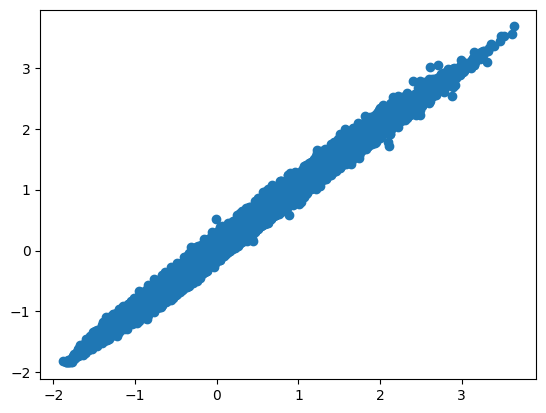

In [28]:
fig,ax = plt.subplots()
ax.scatter(y_pred, y_test)